Student Project 2 - Spam Email Classification

 Methods :
* Logistic Regression
* KNN
* Decision Trees
* SVM
* Naive Bayes
* NN

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report

In [6]:
# Mount Dataset from google drive apabila menggungakan googlecolab
from google.colab import drive 
import os

drive.mount('/content/drive')
# ganti alamat penyimpanan file pada drive
os.chdir("/content/drive/My Drive/Colab Notebooks/Training") #viny drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Load dataset
df = pd.read_csv('DA/datasets/emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# INDEPENDENT VARIABLE
X = df.iloc[:,1:3001]
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [9]:
# DEPENDENT VARIABLE
Y = df.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 1, 0])

### Logistic Regression

In [10]:
logistic = SGDClassifier(loss="log")
print(logistic.get_params())

{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [11]:
# Train model
logistic.fit(X, Y)

print(f"Model weights: {logistic.coef_}, bias: {logistic.intercept_}")

# test
Y_pred = logistic.predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Model weights: [[-195.7765462  -191.41987116 -171.19041681 ...   -3.52584444
   -33.14585945   -3.82805968]], bias: [332.4278955]


In [12]:
# Print report dengan classification metrics
print(classification_report(Y, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3672
           1       0.94      0.81      0.87      1500

    accuracy                           0.93      5172
   macro avg       0.93      0.89      0.91      5172
weighted avg       0.93      0.93      0.93      5172



In [13]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y, Y_pred)
cnf_matrix

array([[3590,   82],
       [ 287, 1213]])

Text(0.5, 427.9555555555555, 'Predicted label')

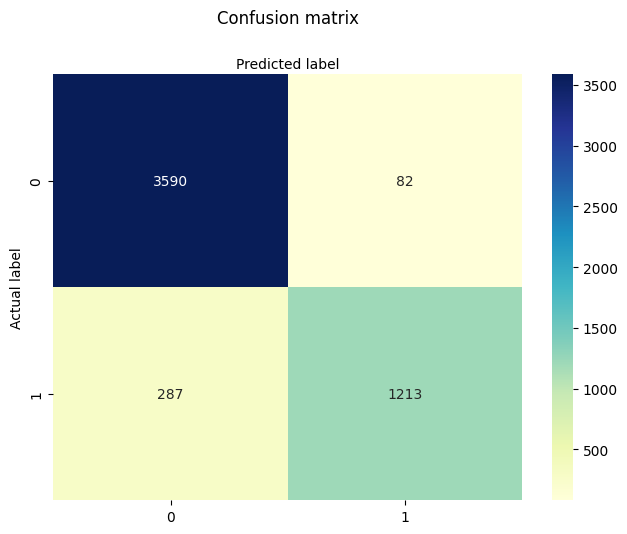

In [14]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
# accuracy, precision, and recall
print("Accuracy:", metrics.accuracy_score(Y, Y_pred))
print("Precision:", metrics.precision_score(Y, Y_pred))
print("Recall:", metrics.recall_score(Y, Y_pred))
print("F1-Score:", metrics.f1_score(Y, Y_pred))

Accuracy: 0.9286542923433875
Precision: 0.9366795366795366
Recall: 0.8086666666666666
F1-Score: 0.8679785330948121


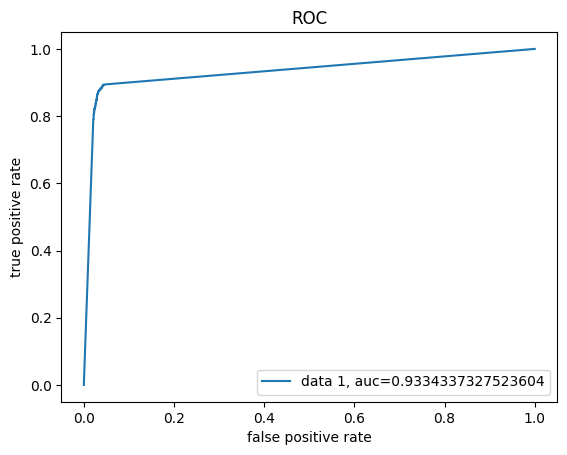

In [16]:
# ROC Curve

y_pred_proba = logistic.predict_proba(X)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y,  y_pred_proba)
auc = metrics.roc_auc_score(Y, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

### KNN

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
# buat data training dan testing
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# buat classifier untuk Nearest Neighbors
n_neighbors = 22
clf = KNeighborsClassifier(n_neighbors, weights='uniform')
print(clf.get_params())

# Train model
clf.fit(trainX, trainY)

# test
y_pred_knn = clf.predict(testX)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 22, 'p': 2, 'weights': 'uniform'}


[[980 104]
 [122 346]]


Text(0.5, 427.9555555555555, 'Predicted label')

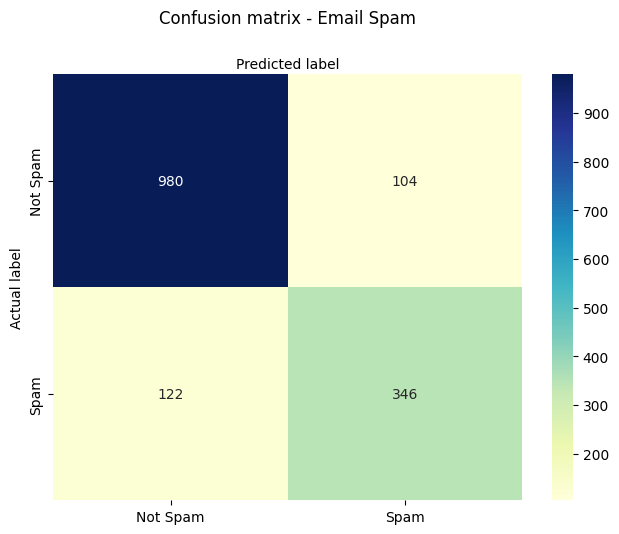

In [20]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(testY, y_pred_knn)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testY, y_pred_knn))
print("Precision:", metrics.precision_score(testY, y_pred_knn))
print("Recall:", metrics.recall_score(testY, y_pred_knn))
print("F1-Score:", metrics.f1_score(testY, y_pred_knn))

Accuracy: 0.854381443298969
Precision: 0.7688888888888888
Recall: 0.7393162393162394
F1-Score: 0.7538126361655774


In [22]:
# from sklearn.model_selection import cross_val_score
# k_values = [i for i in range (1,31)]
# k_scores = []

# # scaler = StandardScaler()
# # X = scaler.fit_transform(X)
# for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     score = cross_val_score(knn, X, Y, cv=5, scoring='accuracy')
#     k_scores.append(np.mean(score))

# # plot to see clearly
# plt.plot(k_values, k_scores)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Cross-Validated Accuracy')
# plt.show()

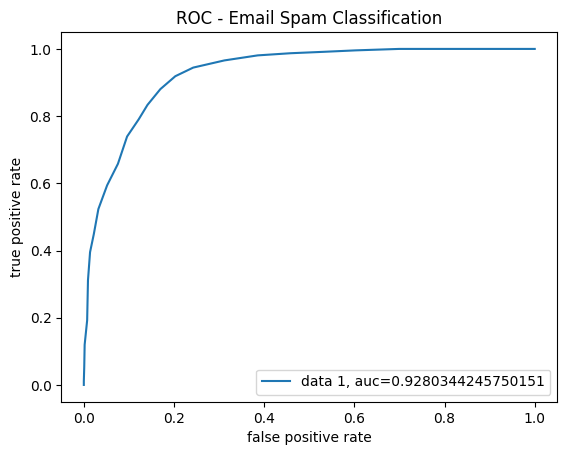

In [23]:
# ROC
y_pred_proba = clf.predict_proba(testX)[::,1]
fpr, tpr, _ = metrics.roc_curve(testY,  y_pred_proba)
auc = metrics.roc_auc_score(testY, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification')
plt.legend(loc=4)
plt.show()

### Decission Tree

In [24]:
# buat data training dan testing
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3)

In [25]:
from sklearn.tree import DecisionTreeClassifier

# buat classifier untuk DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
print(clf_tree.get_params())

# Train model
clf_tree.fit(trainX, trainY)

# test
y_pred_tree = clf.predict(testX)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


[[996  92]
 [100 364]]


Text(0.5, 427.9555555555555, 'Predicted label')

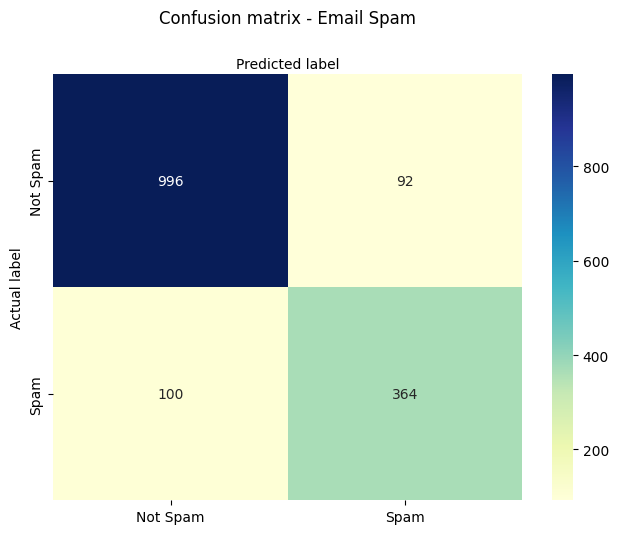

In [26]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(testY, y_pred_tree)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [27]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testY, y_pred_tree))
print("Precision:", metrics.precision_score(testY, y_pred_tree))
print("Recall:", metrics.recall_score(testY, y_pred_tree))
print("F1-Score:", metrics.f1_score(testY, y_pred_tree))

Accuracy: 0.8762886597938144
Precision: 0.7982456140350878
Recall: 0.7844827586206896
F1-Score: 0.7913043478260869


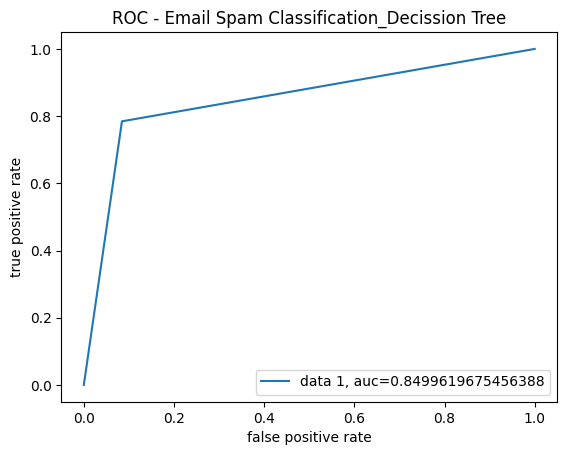

In [28]:
# ROC
y_pred_proba = clf.predict_proba(testX)[::,1]
fpr, tpr, _ = metrics.roc_curve(testY,  y_pred_tree)
auc = metrics.roc_auc_score(testY, y_pred_tree)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification_Decission Tree')
plt.legend(loc=4)
plt.show()

### SVM

In [29]:
from sklearn.svm import SVC

In [30]:
# buat data training dan testing
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3)

In [31]:
# buat classifier untuk SVC
clf = SVC(probability=True)
print(clf.get_params())

# Train model
clf.fit(trainX, trainY)

# test
y_pred_svm = clf.predict(testX)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


[[1105   23]
 [ 265  159]]


Text(0.5, 427.9555555555555, 'Predicted label')

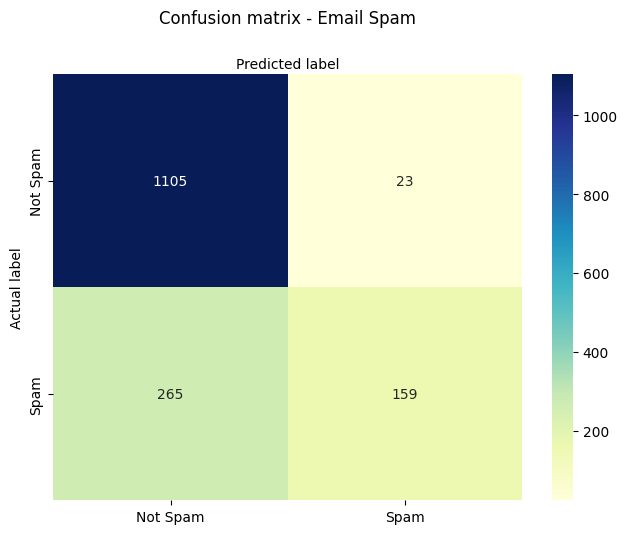

In [32]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(testY, y_pred_svm)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testY, y_pred_tree))
print("Precision:", metrics.precision_score(testY, y_pred_tree))
print("Recall:", metrics.recall_score(testY, y_pred_tree))
print("F1-Score:", metrics.f1_score(testY, y_pred_tree))

Accuracy: 0.5966494845360825
Precision: 0.27850877192982454
Recall: 0.29952830188679247
F1-Score: 0.2886363636363637


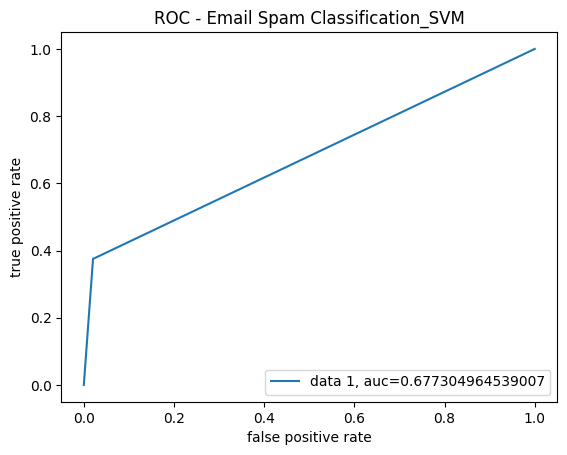

In [34]:
# ROC
y_pred_proba = clf.predict_proba(testX)[::,1]
fpr, tpr, _ = metrics.roc_curve(testY,  y_pred_svm)
auc = metrics.roc_auc_score(testY, y_pred_svm)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification_SVM')
plt.legend(loc=4)
plt.show()

### Naive Bayes

In [35]:
# buat data training dan testing
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3)


In [36]:
from sklearn.naive_bayes import GaussianNB

# buat classifier untuk naive bayes
clf = GaussianNB()
print(clf.get_params())

# Train model
clf.fit(trainX, trainY)

# test
y_pred_gaus = clf.predict(testX)

{'priors': None, 'var_smoothing': 1e-09}


[[1015   68]
 [  18  451]]


Text(0.5, 427.9555555555555, 'Predicted label')

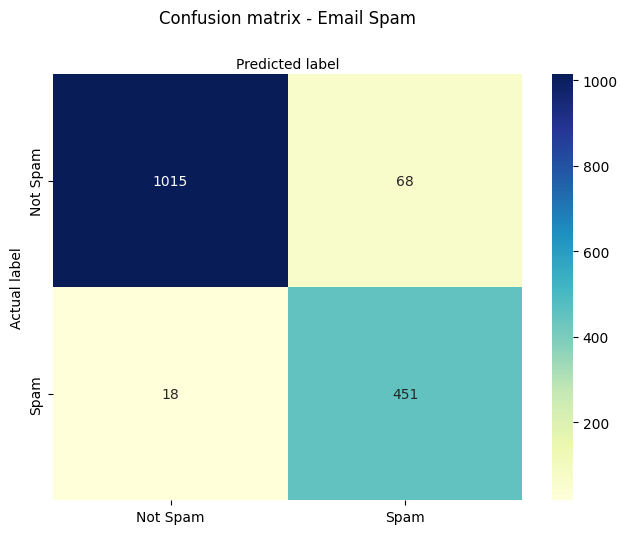

In [37]:
# confusion_matrix
from sklearn import metrics


cnf_matrix = metrics.confusion_matrix(testY, y_pred_gaus)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [38]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testY, y_pred_gaus))
print("Precision:", metrics.precision_score(testY, y_pred_gaus))
print("Recall:", metrics.recall_score(testY, y_pred_gaus))
print("F1-Score:", metrics.f1_score(testY, y_pred_gaus))

Accuracy: 0.9445876288659794
Precision: 0.8689788053949904
Recall: 0.9616204690831557
F1-Score: 0.9129554655870445


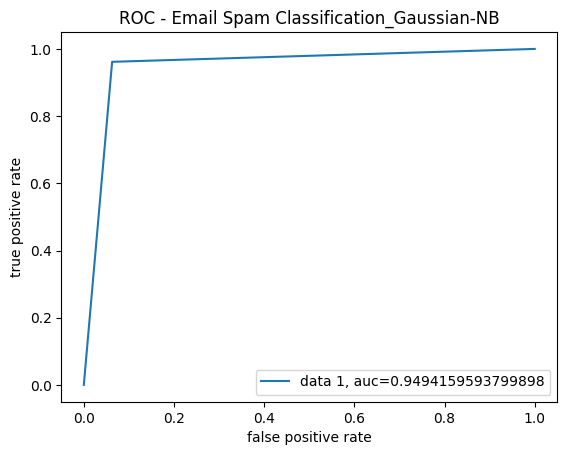

In [39]:
# ROC
y_pred_proba = clf.predict_proba(testX)[::,1]
fpr, tpr, _ = metrics.roc_curve(testY,  y_pred_gaus)
auc = metrics.roc_auc_score(testY, y_pred_gaus)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification_Gaussian-NB')
plt.legend(loc=4)
plt.show()

### Neural Networks

In [40]:
# buat data training dan testing
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3)

In [41]:
from sklearn.neural_network import MLPClassifier

In [42]:
# buat classifier untuk MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(200,150,100),
                    max_iter = 100000,activation = 'relu',
                    solver = 'adam')
print(clf.get_params())

# Train model
clf.fit(trainX, trainY)

# test
y_pred_nn = clf.predict(testX)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (200, 150, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 100000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


[[1070   27]
 [   8  447]]


Text(0.5, 427.9555555555555, 'Predicted label')

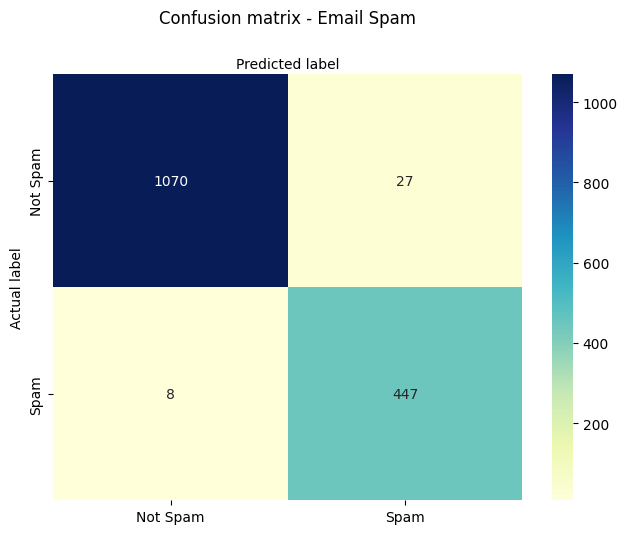

In [43]:
# confusion_matrix
from sklearn import metrics


cnf_matrix = metrics.confusion_matrix(testY, y_pred_nn)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testY, y_pred_nn))
print("Precision:", metrics.precision_score(testY, y_pred_nn))
print("Recall:", metrics.recall_score(testY, y_pred_nn))
print("F1-Score:", metrics.f1_score(testY, y_pred_nn))

Accuracy: 0.9774484536082474
Precision: 0.9430379746835443
Recall: 0.9824175824175824
F1-Score: 0.9623250807319698


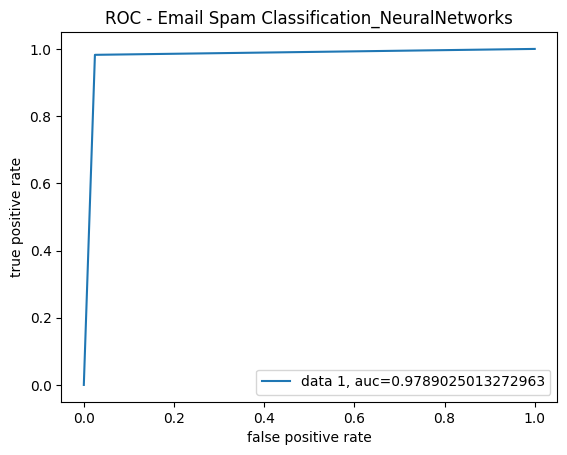

In [45]:
# ROC
y_pred_proba = clf.predict_proba(testX)[::,1]
fpr, tpr, _ = metrics.roc_curve(testY,  y_pred_nn)
auc = metrics.roc_auc_score(testY, y_pred_nn)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification_NeuralNetworks')
plt.legend(loc=4)
plt.show()